Design for this project:
1. Merge all dataset in one whole dataset(at the beginning, can be merge two dataset first, and do implementation for the data pipeline.
2. Use data mining techniques prepare the data pipeline.
 Do data vitrulization and use distance, density to see two location's distance, relationships.

 scale the dataset using factors, how to format the dataset properly.

3. Use LLM to do pre-train and fine-tunning to to the outlier detection. no labal data and compare with the troditional teniques with labal data
Use F1,
4. Compare the model's learning performance and compare the results with original label data. MSE and T5 .



Use basic data preparation to see how the label data

dataset:https://github.com/TimeIsAFriend/trajectory_MiPo/tree/main/dataset


 paper:https://www.mdpi.com/2072-4292/14/21/5394

 github original work from : https://github.com/TimeIsAFriend/trajectory_MiPo

reference: Yang, J.; Tan, X.; Rahardja, S. MiPo: How to Detect Trajectory Outliers with Tabular Outlier Detectors. Remote Sens. 2022, 14, 5394. https://doi.org/10.3390/rs14215394

In [6]:
# Connect the colab with Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [22]:
# Find the dataset in Google Drive
file_path = '/content/drive/My Drive/trajectory_MiPo-main/dataset/StSt5R/inners.txt'



In [23]:
# Read the file -- inners.txt
with open(file_path, 'r') as file:
    file_contents1 = file.read()

print(file_contents1)




[[97891.96064244593, -13304.748564803516], [97941.9632222884, -13155.94499795919], [97981.69695686174, -12972.248352363582], [98002.26885707927, -12820.837817293379], [98007.34127291794, -12805.756242381121], [98014.70104416861, -12792.645626330488], [98072.9460318617, -12696.776905738356], [98026.91536078455, -12580.293603856679], [98043.19229114724, -12389.906269520581], [98089.29499122516, -12176.096544456976], [98136.51044666728, -11933.245806030205], [98229.82376156515, -11644.732666123722], [98314.89998975613, -11193.185192206709], [98314.71080711535, -11179.175354436386], [98315.94717140825, -11159.140940292698], [98305.18456610144, -10920.074792618854], [98364.04316224417, -10648.039237166244], [98582.5935018735, -10485.939866826227], [98917.96340605042, -10494.39862293279], [99291.05365395237, -10451.281878223826], [99583.69254642328, -10695.501932633417], [99898.88095111442, -10934.396536603575], [100197.05421061142, -11030.384928746615], [100333.29798726368, -11239.695142828

In [24]:
from IPython.utils.text import textwrap
import pandas as pd

# Replace this with the actual path to your dataset
path = "/content/drive/My Drive/trajectory_MiPo-main/dataset/StSt5R/inners.txt"

# Read the dataset using pandas
with open(path, 'r') as file:
    lines = file.readlines()

formatted_data = []

# Add a header line
header = "Index""    X Y pair"
formatted_data.append(header)

for i, line in enumerate(lines):
    # Split by ',' and remove any unwanted characters
    elements = line.strip().replace('[', '').replace(']', '').split(',')
    # Add a comma at the end of each line
    formatted_line = f"index {i}:   [{', '.join(elements)}],"
    formatted_data.append(formatted_line)

# Join the formatted lines with newlines to create the final formatted dataset
formatted_dataset = '\n'.join(formatted_data)
print(formatted_dataset)




Index    X Y pair
index 0:   [97891.96064244593,  -13304.748564803516,  97941.9632222884,  -13155.94499795919,  97981.69695686174,  -12972.248352363582,  98002.26885707927,  -12820.837817293379,  98007.34127291794,  -12805.756242381121,  98014.70104416861,  -12792.645626330488,  98072.9460318617,  -12696.776905738356,  98026.91536078455,  -12580.293603856679,  98043.19229114724,  -12389.906269520581,  98089.29499122516,  -12176.096544456976,  98136.51044666728,  -11933.245806030205,  98229.82376156515,  -11644.732666123722,  98314.89998975613,  -11193.185192206709,  98314.71080711535,  -11179.175354436386,  98315.94717140825,  -11159.140940292698,  98305.18456610144,  -10920.074792618854,  98364.04316224417,  -10648.039237166244,  98582.5935018735,  -10485.939866826227,  98917.96340605042,  -10494.39862293279,  99291.05365395237,  -10451.281878223826,  99583.69254642328,  -10695.501932633417,  99898.88095111442,  -10934.396536603575,  100197.05421061142,  -11030.384928746615,  100333.2

In [25]:
!pip install PyDrive


In [26]:
!pip install matplotlib


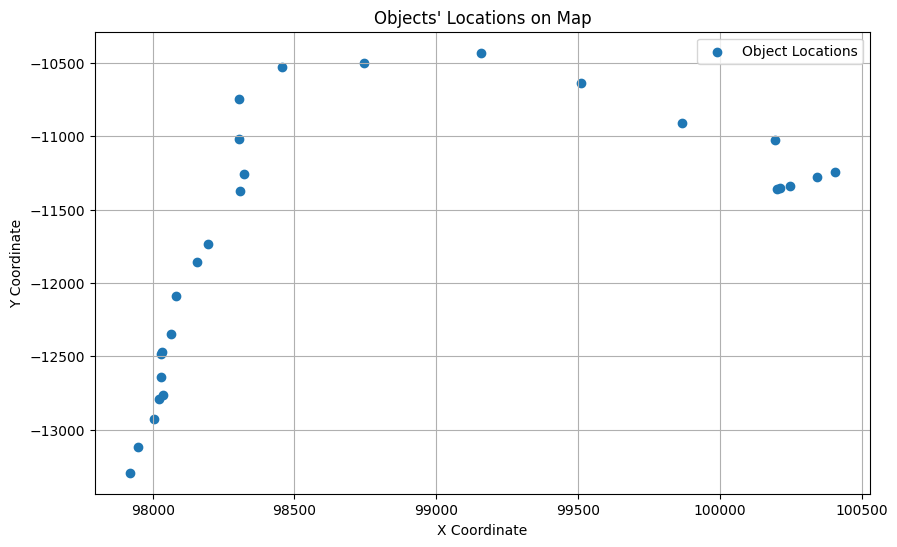

In [27]:
import matplotlib.pyplot as plt

# index 0 : x and y format as pairs, and use x and y coordinates, multiple pairs.
#

# Your X and Y data
data1 = [
    (97920.46045102825, -13294.356347513412),
    (97949.72714548952, -13116.806027721083),
    (98003.7230081856, -12928.91375048445),
    (98021.42851238509, -12788.551478975363),
    (98036.16140944195, -12763.330913348773),
    (98030.76428032378, -12642.296594603295),
    (98029.43001935349, -12487.177472797217),
    (98031.48832537353, -12472.136477717871),
    (98064.50307340373, -12349.583732179304),
    (98082.09507129231, -12089.116631842653),
    (98155.82690657309, -11856.91800757987),
    (98195.57625012657, -11731.27105960403),
    (98307.56597700273, -11375.445419483016),
    (98321.05159547701, -11258.159605024859),
    (98302.76933022366, -11020.195958015205),
    (98304.36690762555, -10747.933570529221),
    (98456.59002092897, -10527.681843847256),
    (98744.7579609894, -10499.754537453566),
    (99158.92317457836, -10430.063818907043),
    (99512.02383602578, -10633.426701594064),
    (99866.13258999615, -10908.82303874867),
    (100195.4787513368, -11025.402175170326),
    (100342.08100827642, -11275.606078757344),
    (100404.9600979815, -11245.712737932285),
    (100245.7976460422, -11341.991269408098),
    (100210.55632580693, -11354.487446384495),
    (100202.35229254737, -11360.60578444404)
]

# Extract X and Y coordinates from the data
x_coords, y_coords = zip(*data1)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x_coords, y_coords, label='Object Locations', marker='o')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Objects\' Locations on Map')
plt.legend()
plt.grid(True)

plt.show()




In [28]:
# check the outliers file and see how about the format of outliers.
file_path = '/content/drive/My Drive/trajectory_MiPo-main/dataset/StSt5R/outliers.txt'

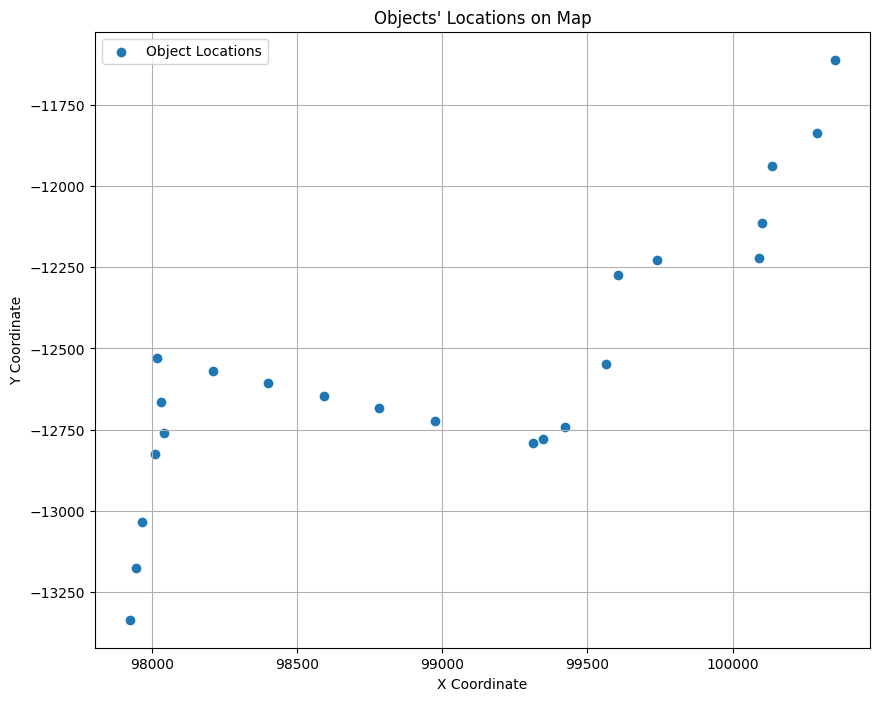

In [29]:
import matplotlib.pyplot as plt
import re

data2 = [[97925.54664469318, -13336.325052157175], [97944.5063420548, -13176.929343171345], [97966.6944382334, -13033.50425980033], [98012.13148843867, -12825.709419105746], [98043.66925728705, -12761.228001035108], [98033.34794184087, -12666.283018104516], [98017.95392322894, -12530.370089508871], [98209.15667219383, -12568.777493815607], [98400.35942115872, -12607.184898122343], [98591.56217012361, -12645.592302429079], [98782.7649190885, -12683.999706735814], [98973.96766805339, -12722.40711104255], [99310.89300080495, -12790.086198012927], [99345.43031284033, -12780.606819384873], [99422.51974232786, -12741.520310067686], [99563.79356504035, -12546.417398158708], [99606.04538218748, -12274.598359685004], [99738.04572933787, -12228.75119634674], [100091.37374968475, -12221.897960116856], [100101.94294780247, -12113.656445743967], [100135.68486528168, -11937.035518624396], [100290.2590579196, -11834.817583610862], [100351.20736639432, -11609.77772137307]]
[[97964.91903138004, -13349.807592073019], [97962.57766966827, -13343.833800363958], [98031.52556559205, -13258.831174569295], [98134.4746517951, -13180.375679211567], [98197.3888869912, -13039.403212498888], [98344.647069517, -13061.436076794942], [98558.19286475886, -13136.616448832376], [98683.75124151216, -13169.946084069634], [98685.98468997881, -13167.914027858249], [98688.99877282478, -13167.873158167498], [98649.3270215294, -12936.169943079974], [98609.65527023403, -12704.46672799245], [98569.98351893865, -12472.763512904927], [98530.31176764327, -12241.060297817403], [98490.6400163479, -12009.357082729879], [98450.96826505252, -11777.653867642355], [98411.29651375714, -11545.950652554831], [98371.62476246177, -11314.247437467307], [98307.7282022658, -10941.059011269237], [98369.24837009894, -10642.96442388695], [98610.50416839981, -10488.564217284053], [98997.53508690806, -10473.298396374483], [99382.3714270282, -10518.095232368949], [99709.297029498, -10789.866751221447], [100066.29323254162, -11000.15621577934], [100353.63765962276, -11239.414611038708], [100378.8111352454, -11644.428126196848]]
[[98015.7822215072, -13265.048514400682], [98120.69690813491, -13220.596827115916], [98147.51220058955, -13141.165368889899], [98210.76312721787, -13025.210357978029], [98338.68654094337, -13066.521043932598], [98552.86408645015, -13132.685065234124], [98531.96042991472, -12956.01682577055], [98511.05677337929, -12779.348586306976], [98490.15311684385, -12602.680346843403], [98469.24946030842, -12426.01210737983], [98448.34580377299, -12249.343867916255], [98427.44214723755, -12072.675628452682], [98406.53849070212, -11896.007388989108], [98385.63483416669, -11719.339149525535], [98364.73117763126, -11542.670910061961], [98343.82752109582, -11366.002670598387], [98308.70453968985, -11069.159136109758], [98309.6803414451, -10750.864422097395], [98452.19234339576, -10536.749335947465], [98718.40796869986, -10501.113066192744], [99131.12152810287, -10435.447187171632], [99470.70520140765, -10586.950054204914], [99814.96262523781, -10858.47994421456], [100117.54490987238, -11001.452854018637], [100304.2946125132, -11158.022034764517], [100367.15302410067, -11345.322598767327], [100406.94162625124, -11334.764684351785], [100249.30698900977, -11377.974972735014]]
[[97968.67327101012, -13348.756175447304], [97973.7327069636, -13332.673923177688], [98002.01711039981, -13306.270136038102], [98055.61158833021, -13256.504946024377], [98113.32338589447, -13232.706846092171], [98140.78595345923, -13201.309157438172], [98177.78600721479, -13094.716346568666], [98239.47733042552, -13030.828128926418], [98311.08745846256, -13031.862925849638], [98441.2044933466, -13068.137763791303], [98667.62909888185, -13148.145171830052], [98707.06970949452, -13166.627211449633], [98978.93868737703, -13040.826758420535], [98971.00137705046, -12955.859308228568], [99028.6774528146, -12818.954086395626], [99112.79980919088, -12576.595057828992], [99232.97203941456, -12325.736328846559], [99350.22453189327, -12195.086530508559], [99467.47702437198, -12064.43673217056], [99584.7295168507, -11933.78693383256], [99701.98200932941, -11803.13713549456], [99819.23450180813, -11672.48733715656], [99936.48699428684, -11541.837538818561], [100053.73948676555, -11411.187740480562], [100170.99197924427, -11280.537942142562], [100294.29476872025, -11143.146538011164], [100366.95990101667, -11331.312791405757], [100370.11415833623, -11232.181083903035], [100247.20786332444, -11334.965604893947], [100099.6270776183, -11397.051007845786]]
[[97928.68205910042, -13289.241309640596], [97957.06044084209, -13101.694065994747], [98003.57490106096, -12917.90601653665], [98017.6341716846, -12786.600815331172], [98020.75583342074, -12794.565846010886], [98046.30509262183, -12677.118190173347], [98028.19250097682, -12507.211832956187], [98035.61837868119, -12443.055188717179], [98097.2200818929, -12205.015365556013], [98149.34510253677, -11935.074461405411], [98280.06034997337, -11458.890499543293], [98321.11571484694, -11207.113587024616], [98316.98426532948, -11180.14551667454], [98310.40032614912, -11083.148614773912], [98305.20471868107, -10809.977137537937], [98398.94589722987, -10610.534438305009], [98468.9187259109, -10762.383190306924], [98538.89155459193, -10914.23194230884], [98608.86438327296, -11066.080694310755], [98678.83721195399, -11217.92944631267], [98748.81004063501, -11369.778198314585], [98818.78286931604, -11521.6269503165], [98888.75569799707, -11673.475702318416], [98958.7285266781, -11825.324454320331], [99028.70135535912, -11977.173206322246], [99098.67418404015, -12129.021958324161], [99168.64701272118, -12280.870710326077], [99238.61984140221, -12432.719462327992], [99377.96904509894, -12735.12259612525], [99520.91352138598, -12607.057250249369], [99623.09936373065, -12364.44489010047], [99655.22390657384, -12233.889474158708], [99966.33301593855, -12225.618604273932], [100129.46477849719, -12142.30359606075], [100109.40186950601, -11998.45147075083], [100261.22158169786, -11860.240024075789], [100321.91892077902, -11726.284940108626], [100369.44288747317, -11511.438886389578]]
[[97951.5168054547, -13305.949064529677], [98076.48138042506, -13239.208709516763], [98146.34224126552, -13166.203265432401], [98235.03950742766, -13092.942901524622], [98326.88703175372, -13085.697288200425], [98334.66231305554, -13047.558597675397], [98497.66364315529, -13063.37033522886], [98526.08492662075, -13103.021063789998], [98593.33729313052, -13116.122722573698], [98688.06900496878, -13154.874244811692], [98777.95091997602, -13042.388192793333], [98867.83283498326, -12929.902140774973], [98957.7147499905, -12817.416088756614], [99105.27428676179, -12632.747240437968], [99192.02002787535, -12417.375439019017], [99255.40106289825, -12257.370065839305], [99329.93019039457, -12086.202146208134], [99430.64859547562, -11846.615160536017], [99529.3735768957, -11627.071688525157], [99650.78839433761, -11414.222240241445], [99761.56882092234, -11305.608931734469], [99971.4772481907, -11392.80767736651], [100070.88266308342, -11498.536319868315], [100170.65263786839, -11685.330754312812], [100333.50405270065, -11692.094910024518], [100367.54148058333, -11537.488277644266]]
[[97906.2374559826, -13301.553876568281], [97937.71119284163, -13176.01990129115], [97980.9030733927, -12969.25638745686], [98109.81766439656, -12916.474546980693], [98189.04444241174, -12979.46270249867], [98333.67914791063, -13030.556831946062], [98523.42278012395, -13129.080132428597], [98549.86355674163, -13133.726581154324], [98570.92547272585, -12932.20704878181], [98591.98738871007, -12730.687516409294], [98613.04930469429, -12529.16798403678], [98634.1112206785, -12327.648451664265], [98655.17313666272, -12126.12891929175], [98676.23505264694, -11924.609386919235], [98697.29696863116, -11723.08985454672], [98718.35888461537, -11521.570322174206], [98739.42080059959, -11320.050789801691], [98760.4827165838, -11118.531257429177], [98781.54463256802, -10917.011725056662], [98802.60654855224, -10715.492192684147], [98824.0116673328, -10510.68891029265], [99216.169216331, -10429.283232591617], [99528.7323399223, -10643.207001032359], [99831.82299836642, -10879.26726533439], [100112.32687665983, -11005.528222994817], [100294.29476872025, -11143.146538011164], [100366.95990101667, -11331.312791405757], [100370.11415833623, -11232.181083903035], [100247.20786332444, -11334.965604893947], [100099.6270776183, -11397.051007845786]]
[[97967.91973158783, -13348.766318299837], [97985.46626047447, -13308.49474352633], [98049.32742959472, -13237.572801169406], [98138.1478885869, -13173.319956756788], [98275.38852201604, -13157.831777632176], [98412.62915544519, -13142.343598507565], [98549.86978887433, -13126.855419382953], [98687.11042230348, -13111.367240258342], [98934.29907802738, -13083.470967254034], [98985.9106379285, -13054.74435500844], [99127.74271806345, -12954.726966186361], [99296.79512683782, -12806.292773206731], [99349.80104991554, -12769.537385009717], [99484.42954865734, -12694.63338739782], [99574.57551507694, -12508.236107622564], [99602.20911183265, -12324.695305639993], [99647.62120311233, -12228.989145521315], [99906.75766518223, -12222.433238774382], [100136.94726532692, -12193.246027739206], [100100.48801693118, -12062.631067445498], [100160.31285731202, -11919.68141511253], [100287.30065386399, -11838.861922257753], [100338.35015763271, -11661.000469195387], [100333.02884045902, -11438.876110449242]]
[[97933.12253857125, -13283.176256475332], [97935.16787762567, -13267.134587649647], [97945.9864743575, -13174.907655717734], [97944.02195074336, -13140.904029532676], [97943.9815847067, -13137.90192006403], [97976.82626407822, -13002.340455228998], [98026.83756171718, -12798.487466788272], [98184.99727123576, -12886.716636164005], [98343.15698075433, -12974.945805539737], [98501.3166902729, -13063.17497491547], [98688.99877282478, -13167.873158167498], [98690.54648755258, -13170.854829975813], [98815.82790410593, -13128.118588016012], [99006.26079716878, -12999.418757585148], [99028.00560016562, -12824.968551352988], [99127.14277983537, -12578.401472984988], [99267.19672286276, -12238.192294499535], [99420.52475925357, -11877.781033558836], [99574.86402053373, -11537.370172743036], [99732.147904638, -11303.009629941023], [99767.74627984442, -11316.534003875366], [99986.6814093281, -11402.607642036839], [100068.3536618973, -11588.651204145488]]


# Extract x and y coordinates from the data
x_coords = []
y_coords = []

for item in data2:
    for i in range(0, len(item), 2):
        x_coords.append(item[i])
        y_coords.append(item[i+1])

plt.figure(figsize=(10, 8))
plt.scatter(x_coords, y_coords, label='Object Locations', marker='o')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Objects\' Locations on Map')
plt.legend()
plt.grid(True)

plt.show()



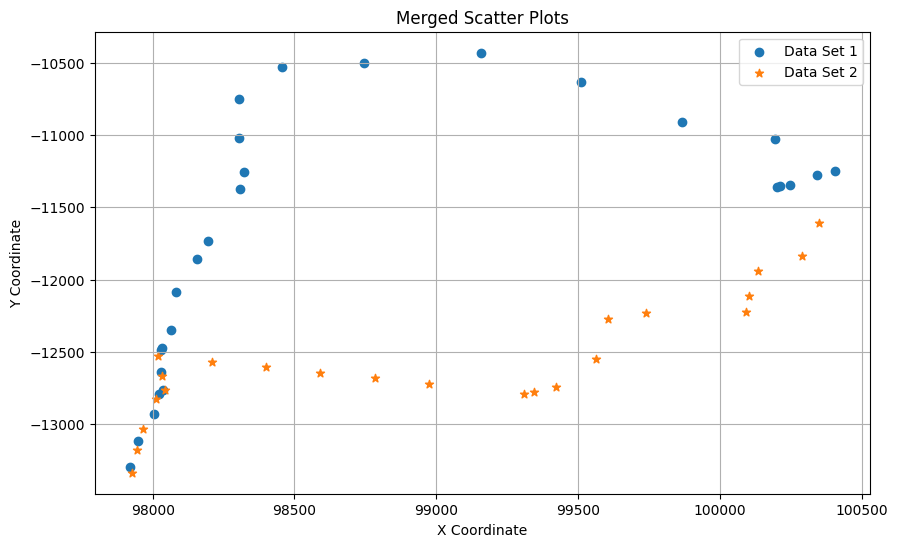

In [30]:
# merge index 0's data from outliners txt with innners in one plot, and see what's going on.
import matplotlib.pyplot as plt
data1 =  [
    [97920.46045102825, -13294.356347513412],
    [97949.72714548952, -13116.806027721083],
    [98003.7230081856, -12928.91375048445],
    [98021.42851238509, -12788.551478975363],
    [98036.16140944195, -12763.330913348773],
    [98030.76428032378, -12642.296594603295],
    [98029.43001935349, -12487.177472797217],
    [98031.48832537353, -12472.136477717871],
    [98064.50307340373, -12349.583732179304],
    [98082.09507129231, -12089.116631842653],
    [98155.82690657309, -11856.91800757987],
    [98195.57625012657, -11731.27105960403],
    [98307.56597700273, -11375.445419483016],
    [98321.05159547701, -11258.159605024859],
    [98302.76933022366, -11020.195958015205],
    [98304.36690762555, -10747.933570529221],
    [98456.59002092897, -10527.681843847256],
    [98744.7579609894, -10499.754537453566],
    [99158.92317457836, -10430.063818907043],
    [99512.02383602578, -10633.426701594064],
    [99866.13258999615, -10908.82303874867],
    [100195.4787513368, -11025.402175170326],
    [100342.08100827642, -11275.606078757344],
    [100404.9600979815, -11245.712737932285],
    [100245.7976460422, -11341.991269408098],
    [100210.55632580693, -11354.487446384495],
    [100202.35229254737, -11360.60578444404]
]

data2 = [[97925.54664469318, -13336.325052157175], [97944.5063420548, -13176.929343171345], [97966.6944382334, -13033.50425980033], [98012.13148843867, -12825.709419105746], [98043.66925728705, -12761.228001035108], [98033.34794184087, -12666.283018104516], [98017.95392322894, -12530.370089508871], [98209.15667219383, -12568.777493815607], [98400.35942115872, -12607.184898122343], [98591.56217012361, -12645.592302429079], [98782.7649190885, -12683.999706735814], [98973.96766805339, -12722.40711104255], [99310.89300080495, -12790.086198012927], [99345.43031284033, -12780.606819384873], [99422.51974232786, -12741.520310067686], [99563.79356504035, -12546.417398158708], [99606.04538218748, -12274.598359685004], [99738.04572933787, -12228.75119634674], [100091.37374968475, -12221.897960116856], [100101.94294780247, -12113.656445743967], [100135.68486528168, -11937.035518624396], [100290.2590579196, -11834.817583610862], [100351.20736639432, -11609.77772137307]]
[[97964.91903138004, -13349.807592073019], [97962.57766966827, -13343.833800363958], [98031.52556559205, -13258.831174569295], [98134.4746517951, -13180.375679211567], [98197.3888869912, -13039.403212498888], [98344.647069517, -13061.436076794942], [98558.19286475886, -13136.616448832376], [98683.75124151216, -13169.946084069634], [98685.98468997881, -13167.914027858249], [98688.99877282478, -13167.873158167498], [98649.3270215294, -12936.169943079974], [98609.65527023403, -12704.46672799245], [98569.98351893865, -12472.763512904927], [98530.31176764327, -12241.060297817403], [98490.6400163479, -12009.357082729879], [98450.96826505252, -11777.653867642355], [98411.29651375714, -11545.950652554831], [98371.62476246177, -11314.247437467307], [98307.7282022658, -10941.059011269237], [98369.24837009894, -10642.96442388695], [98610.50416839981, -10488.564217284053], [98997.53508690806, -10473.298396374483], [99382.3714270282, -10518.095232368949], [99709.297029498, -10789.866751221447], [100066.29323254162, -11000.15621577934], [100353.63765962276, -11239.414611038708], [100378.8111352454, -11644.428126196848]]
[[98015.7822215072, -13265.048514400682], [98120.69690813491, -13220.596827115916], [98147.51220058955, -13141.165368889899], [98210.76312721787, -13025.210357978029], [98338.68654094337, -13066.521043932598], [98552.86408645015, -13132.685065234124], [98531.96042991472, -12956.01682577055], [98511.05677337929, -12779.348586306976], [98490.15311684385, -12602.680346843403], [98469.24946030842, -12426.01210737983], [98448.34580377299, -12249.343867916255], [98427.44214723755, -12072.675628452682], [98406.53849070212, -11896.007388989108], [98385.63483416669, -11719.339149525535], [98364.73117763126, -11542.670910061961], [98343.82752109582, -11366.002670598387], [98308.70453968985, -11069.159136109758], [98309.6803414451, -10750.864422097395], [98452.19234339576, -10536.749335947465], [98718.40796869986, -10501.113066192744], [99131.12152810287, -10435.447187171632], [99470.70520140765, -10586.950054204914], [99814.96262523781, -10858.47994421456], [100117.54490987238, -11001.452854018637], [100304.2946125132, -11158.022034764517], [100367.15302410067, -11345.322598767327], [100406.94162625124, -11334.764684351785], [100249.30698900977, -11377.974972735014]]
[[97968.67327101012, -13348.756175447304], [97973.7327069636, -13332.673923177688], [98002.01711039981, -13306.270136038102], [98055.61158833021, -13256.504946024377], [98113.32338589447, -13232.706846092171], [98140.78595345923, -13201.309157438172], [98177.78600721479, -13094.716346568666], [98239.47733042552, -13030.828128926418], [98311.08745846256, -13031.862925849638], [98441.2044933466, -13068.137763791303], [98667.62909888185, -13148.145171830052], [98707.06970949452, -13166.627211449633], [98978.93868737703, -13040.826758420535], [98971.00137705046, -12955.859308228568], [99028.6774528146, -12818.954086395626], [99112.79980919088, -12576.595057828992], [99232.97203941456, -12325.736328846559], [99350.22453189327, -12195.086530508559], [99467.47702437198, -12064.43673217056], [99584.7295168507, -11933.78693383256], [99701.98200932941, -11803.13713549456], [99819.23450180813, -11672.48733715656], [99936.48699428684, -11541.837538818561], [100053.73948676555, -11411.187740480562], [100170.99197924427, -11280.537942142562], [100294.29476872025, -11143.146538011164], [100366.95990101667, -11331.312791405757], [100370.11415833623, -11232.181083903035], [100247.20786332444, -11334.965604893947], [100099.6270776183, -11397.051007845786]]
[[97928.68205910042, -13289.241309640596], [97957.06044084209, -13101.694065994747], [98003.57490106096, -12917.90601653665], [98017.6341716846, -12786.600815331172], [98020.75583342074, -12794.565846010886], [98046.30509262183, -12677.118190173347], [98028.19250097682, -12507.211832956187], [98035.61837868119, -12443.055188717179], [98097.2200818929, -12205.015365556013], [98149.34510253677, -11935.074461405411], [98280.06034997337, -11458.890499543293], [98321.11571484694, -11207.113587024616], [98316.98426532948, -11180.14551667454], [98310.40032614912, -11083.148614773912], [98305.20471868107, -10809.977137537937], [98398.94589722987, -10610.534438305009], [98468.9187259109, -10762.383190306924], [98538.89155459193, -10914.23194230884], [98608.86438327296, -11066.080694310755], [98678.83721195399, -11217.92944631267], [98748.81004063501, -11369.778198314585], [98818.78286931604, -11521.6269503165], [98888.75569799707, -11673.475702318416], [98958.7285266781, -11825.324454320331], [99028.70135535912, -11977.173206322246], [99098.67418404015, -12129.021958324161], [99168.64701272118, -12280.870710326077], [99238.61984140221, -12432.719462327992], [99377.96904509894, -12735.12259612525], [99520.91352138598, -12607.057250249369], [99623.09936373065, -12364.44489010047], [99655.22390657384, -12233.889474158708], [99966.33301593855, -12225.618604273932], [100129.46477849719, -12142.30359606075], [100109.40186950601, -11998.45147075083], [100261.22158169786, -11860.240024075789], [100321.91892077902, -11726.284940108626], [100369.44288747317, -11511.438886389578]]
[[97951.5168054547, -13305.949064529677], [98076.48138042506, -13239.208709516763], [98146.34224126552, -13166.203265432401], [98235.03950742766, -13092.942901524622], [98326.88703175372, -13085.697288200425], [98334.66231305554, -13047.558597675397], [98497.66364315529, -13063.37033522886], [98526.08492662075, -13103.021063789998], [98593.33729313052, -13116.122722573698], [98688.06900496878, -13154.874244811692], [98777.95091997602, -13042.388192793333], [98867.83283498326, -12929.902140774973], [98957.7147499905, -12817.416088756614], [99105.27428676179, -12632.747240437968], [99192.02002787535, -12417.375439019017], [99255.40106289825, -12257.370065839305], [99329.93019039457, -12086.202146208134], [99430.64859547562, -11846.615160536017], [99529.3735768957, -11627.071688525157], [99650.78839433761, -11414.222240241445], [99761.56882092234, -11305.608931734469], [99971.4772481907, -11392.80767736651], [100070.88266308342, -11498.536319868315], [100170.65263786839, -11685.330754312812], [100333.50405270065, -11692.094910024518], [100367.54148058333, -11537.488277644266]]
[[97906.2374559826, -13301.553876568281], [97937.71119284163, -13176.01990129115], [97980.9030733927, -12969.25638745686], [98109.81766439656, -12916.474546980693], [98189.04444241174, -12979.46270249867], [98333.67914791063, -13030.556831946062], [98523.42278012395, -13129.080132428597], [98549.86355674163, -13133.726581154324], [98570.92547272585, -12932.20704878181], [98591.98738871007, -12730.687516409294], [98613.04930469429, -12529.16798403678], [98634.1112206785, -12327.648451664265], [98655.17313666272, -12126.12891929175], [98676.23505264694, -11924.609386919235], [98697.29696863116, -11723.08985454672], [98718.35888461537, -11521.570322174206], [98739.42080059959, -11320.050789801691], [98760.4827165838, -11118.531257429177], [98781.54463256802, -10917.011725056662], [98802.60654855224, -10715.492192684147], [98824.0116673328, -10510.68891029265], [99216.169216331, -10429.283232591617], [99528.7323399223, -10643.207001032359], [99831.82299836642, -10879.26726533439], [100112.32687665983, -11005.528222994817], [100294.29476872025, -11143.146538011164], [100366.95990101667, -11331.312791405757], [100370.11415833623, -11232.181083903035], [100247.20786332444, -11334.965604893947], [100099.6270776183, -11397.051007845786]]
[[97967.91973158783, -13348.766318299837], [97985.46626047447, -13308.49474352633], [98049.32742959472, -13237.572801169406], [98138.1478885869, -13173.319956756788], [98275.38852201604, -13157.831777632176], [98412.62915544519, -13142.343598507565], [98549.86978887433, -13126.855419382953], [98687.11042230348, -13111.367240258342], [98934.29907802738, -13083.470967254034], [98985.9106379285, -13054.74435500844], [99127.74271806345, -12954.726966186361], [99296.79512683782, -12806.292773206731], [99349.80104991554, -12769.537385009717], [99484.42954865734, -12694.63338739782], [99574.57551507694, -12508.236107622564], [99602.20911183265, -12324.695305639993], [99647.62120311233, -12228.989145521315], [99906.75766518223, -12222.433238774382], [100136.94726532692, -12193.246027739206], [100100.48801693118, -12062.631067445498], [100160.31285731202, -11919.68141511253], [100287.30065386399, -11838.861922257753], [100338.35015763271, -11661.000469195387], [100333.02884045902, -11438.876110449242]]
[[97933.12253857125, -13283.176256475332], [97935.16787762567, -13267.134587649647], [97945.9864743575, -13174.907655717734], [97944.02195074336, -13140.904029532676], [97943.9815847067, -13137.90192006403], [97976.82626407822, -13002.340455228998], [98026.83756171718, -12798.487466788272], [98184.99727123576, -12886.716636164005], [98343.15698075433, -12974.945805539737], [98501.3166902729, -13063.17497491547], [98688.99877282478, -13167.873158167498], [98690.54648755258, -13170.854829975813], [98815.82790410593, -13128.118588016012], [99006.26079716878, -12999.418757585148], [99028.00560016562, -12824.968551352988], [99127.14277983537, -12578.401472984988], [99267.19672286276, -12238.192294499535], [99420.52475925357, -11877.781033558836], [99574.86402053373, -11537.370172743036], [99732.147904638, -11303.009629941023], [99767.74627984442, -11316.534003875366], [99986.6814093281, -11402.607642036839], [100068.3536618973, -11588.651204145488]]

x1, y1 = zip(*data1)
x2, y2 = zip(*data2)

# Create a figure with subplots
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(x1, y1, label='Data Set 1', marker='o')

ax.scatter(x2, y2, label='Data Set 2', marker='*')

ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_title('Merged Scatter Plots')
ax.legend()
ax.grid(True)

plt.show()


It seems some dot in the very close location but some is far away from the inners. Might need to see how about all the data's look like in one folder, and plot them in diffrent views.

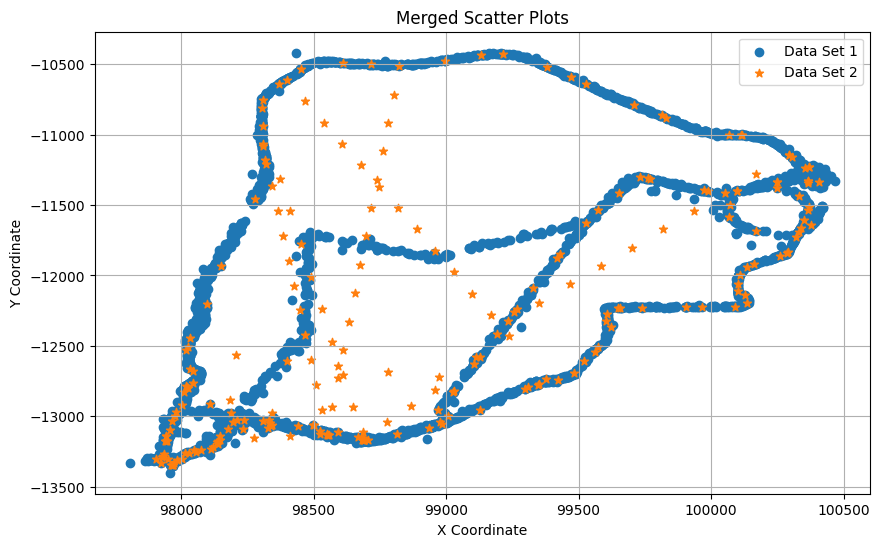

In [31]:
# use json
# reads JSON lines from the file "inners1.txt" and appends them to the inline list
import json

inner = "inners1.txt"
# reads JSON lines from the file "outliers.txt" and appends them to the outline list
out = "outliers.txt"

inline = []
outline = []
f = open(inner)
for line in f.readlines():
  #print(line)
  #arr =  line.split(',')
  js = json.loads(line)
  inline += js
  #print(js)
  #print(len(arr))
#print(len(inline))
#print(inline[:10])


f2 = open(out)
#print(len(f2.readlines()))
for line in f2.readlines():
  js = json.loads(line)
  outline += js


import matplotlib.pyplot as plt

x1, y1 = zip(*inline)
x2, y2 = zip(*outline)


fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x1, y1, label='Data Set 1', marker='o')

ax.scatter(x2, y2, label='Data Set 2', marker='*')

ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_title('Merged Scatter Plots')
ax.legend()
ax.grid(True)

plt.show()


In [32]:
inline = [(float(x), float(y)) for x, y in inline]


In [33]:
!pip install matplotlib numpy


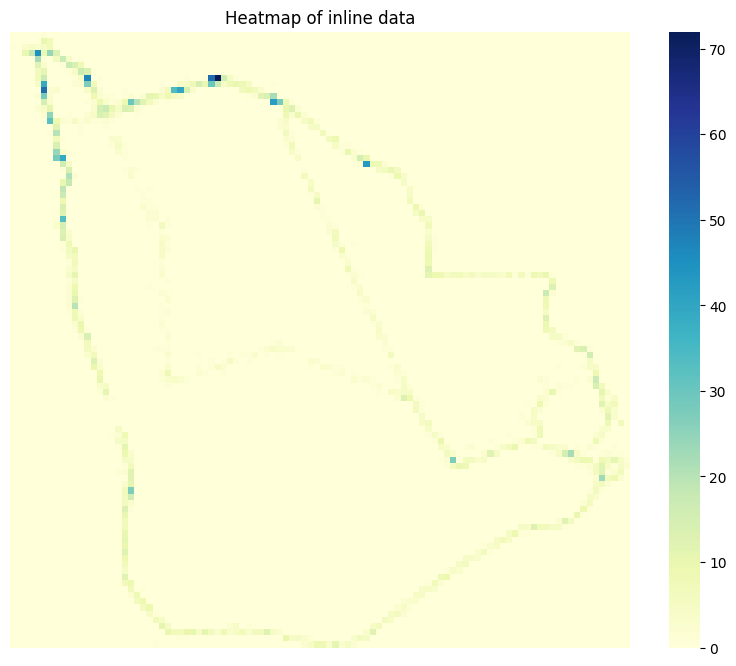

In [34]:
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#  plotting it as a 2D histogram (heat map) using NumPy, Seaborn, and Matplotlib.

x = [point[0] for point in inline]
y = [point[1] for point in inline]


heatmap_data, xedges, yedges = np.histogram2d(x, y, bins=(100, 100))
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data.T, cmap='YlGnBu', cbar=True, xticklabels=False, yticklabels=False)
plt.title("Heatmap of inline data")
plt.show()


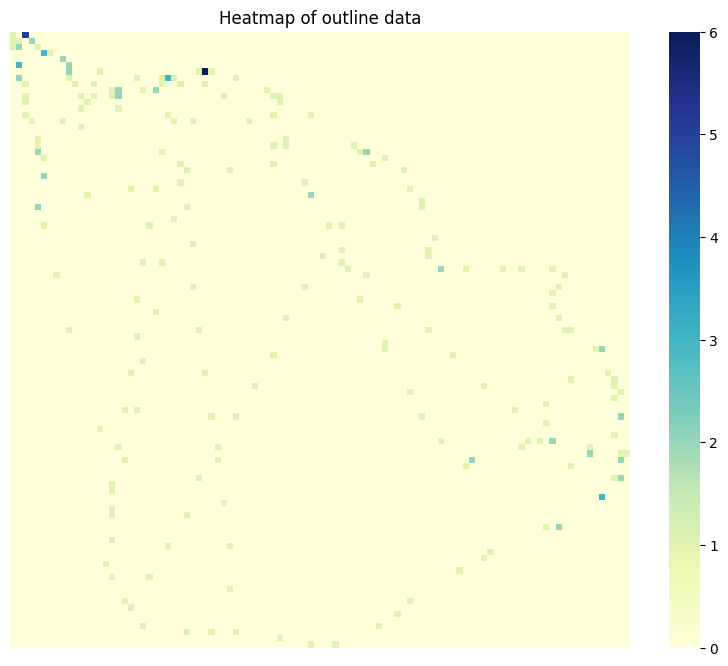

In [35]:
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#  plotting it as a 2D histogram (heat map) using NumPy, Seaborn, and Matplotlib.

x = [point[0] for point in outline]
y = [point[1] for point in outline]


heatmap_data, xedges, yedges = np.histogram2d(x, y, bins=(100, 100))
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data.T, cmap='YlGnBu', cbar=True, xticklabels=False, yticklabels=False)
plt.title("Heatmap of outline data")
plt.show()

K-means:
can be used to cluster spatial data points, such as GPS coordinates, to identify regions of interest or activity hubs.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


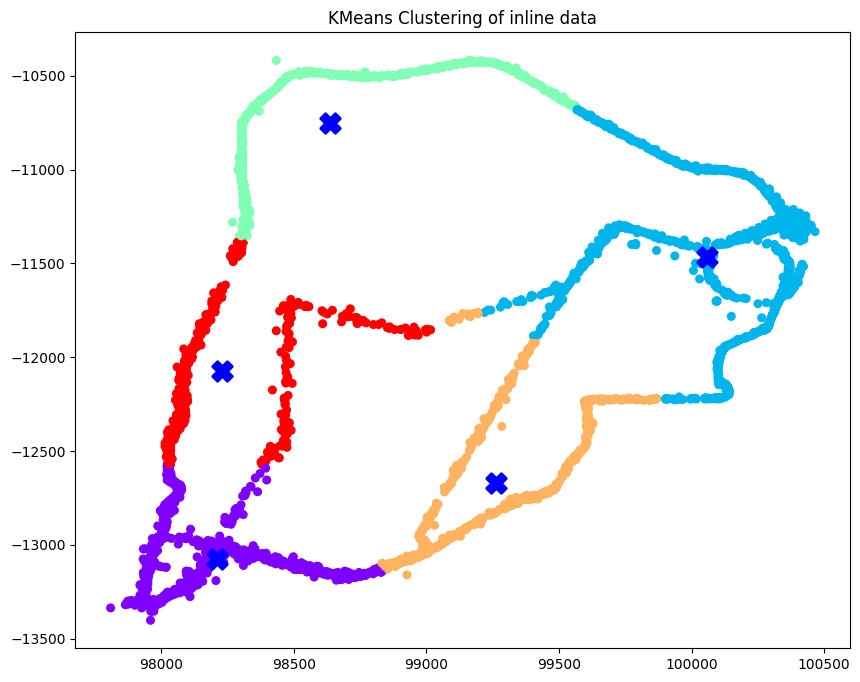

In [36]:
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans



# Convert inline to a numpy array for compatibility with sklearn
data_array = np.array(inline)

# Apply KMeans clustering.
kmeans = KMeans(n_clusters=5)
kmeans.fit(data_array)
labels = kmeans.predict(data_array)
centroids = kmeans.cluster_centers_

# Plot the clustered points with the centroids
plt.figure(figsize=(10, 8))
plt.scatter(data_array[:, 0], data_array[:, 1], c=labels, cmap='rainbow', s=30)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, linewidths=2, color='blue', zorder=10)
plt.title("KMeans Clustering of inline data")
plt.show()


<ipython-input-38-b70836a0b448>:12: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  density = kde.gaussian_kde(data_array.T)


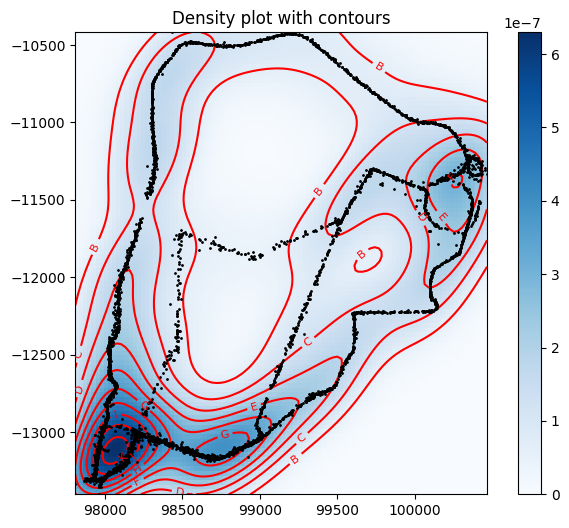

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kde



# Convert inline to a numpy array
data_array = np.array(inline)

# Compute 2D density
x, y = data_array.T
density = kde.gaussian_kde(data_array.T)
xx, yy = np.mgrid[x.min():x.max():100j, y.min():y.max():100j]
positions = np.vstack([xx.ravel(), yy.ravel()])
f = np.reshape(density(positions).T, xx.shape)

# Plot the density heatmap
fig, ax = plt.subplots(figsize=(8, 6))
c = ax.imshow(np.rot90(f), cmap='Blues', extent=[x.min(), x.max(), y.min(), y.max()])
fig.colorbar(c, ax=ax)

# Overlay contour lines
contours = ax.contour(xx, yy, f, levels=10, colors='red')
plt.clabel(contours, inline=True, fontsize=8, fmt={contour: letter for contour, letter in zip(contours.levels, "ABCDEFGHIJKLMNOPQRSTUVWXYZ")})

# Scatter plot to show original points
ax.plot(x, y, 'k.', markersize=2)

ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(), y.max())
plt.title("Density plot with contours")
plt.show()


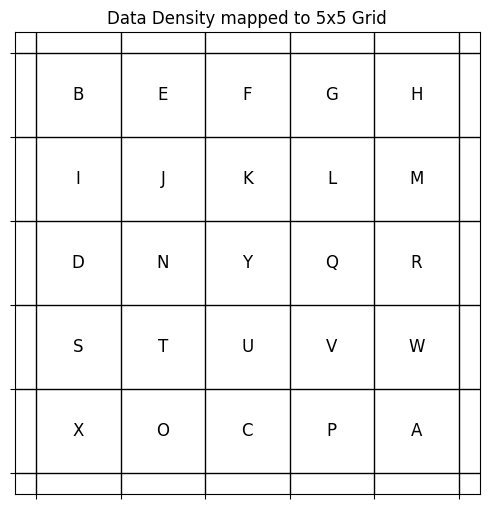

Grid Text for BART:
BEFGH IJKLM DNYQR STUVW XOCPA


In [56]:
import numpy as np
import matplotlib.pyplot as plt



# Convert inline to a numpy array
data_array = np.array(inline)

# Discretize data onto a 5x5 grid
x_bins = np.linspace(data_array[:, 0].min(), data_array[:, 0].max(), 6)
y_bins = np.linspace(data_array[:, 1].min(), data_array[:, 1].max(), 6)

# Count number of points in each grid cell
counts, _, _ = np.histogram2d(data_array[:, 0], data_array[:, 1], bins=[x_bins, y_bins])

# Map counts to letters
letters = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
sorted_counts = np.argsort(counts, axis=None)[::-1]
grid_labels = -1 * np.ones_like(counts, dtype=int)
for i, idx in enumerate(sorted_counts[:len(letters)]):
    r, c = np.unravel_index(idx, counts.shape)
    grid_labels[r, c] = i

grid = np.array([[letters[i] if i >= 0 else ' ' for i in row] for row in grid_labels])

# Plot the grid
fig, ax = plt.subplots(figsize=(6, 6))

# Draw grid lines
for i in range(6):
    ax.axhline(i, color="black", lw=1)
    ax.axvline(i, color="black", lw=1)

# Add text labels to each cell
for i in range(5):
    for j in range(5):
        ax.text(j+0.5, 5-i-0.5, grid[i, j], ha='center', va='center', fontsize=12)

# Remove axis labels
ax.set_xticks(np.arange(0, 6, 1))
ax.set_yticks(np.arange(0, 6, 1))
ax.set_xticklabels([])
ax.set_yticklabels([])

plt.title("Data Density mapped to 5x5 Grid")
plt.show()

# Convert grid to text for BART
grid_text = [''.join(row) for row in grid]
input_text_for_BART = ' '.join(grid_text)

print("Grid Text for BART:")
print(input_text_for_BART)

In [67]:

!pip install torch torchvision


In [70]:
!pip install torch torchvision


In [71]:
def describe(x):
  print("Type:{}".format(x.type()))


In [72]:
import torch
describe(torch, Tensor(2,3))

NameError: ignored

In [75]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Sample inline data

# Convert inline to a numpy array
data_array = np.array(inline)

# Discretize data onto a 5x5 grid and assign labels
x_bins = np.linspace(data_array[:, 0].min(), data_array[:, 0].max(), 6)
y_bins = np.linspace(data_array[:, 1].min(), data_array[:, 1].max(), 6)
counts, _, _ = np.histogram2d(data_array[:, 0], data_array[:, 1], bins=[x_bins, y_bins])
labels = np.argsort(counts, axis=None)[::-1][:len(data_array)]

# One-hot encode labels
one_hot_labels = to_categorical(labels, num_classes=26)

# Build a simple neural network model
model = Sequential([
    Dense(32, activation='relu', input_shape=(2,)),
    Dense(26, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(data_array, one_hot_labels, epochs=50, batch_size=1, validation_split=0.2)

# You can then use the trained model to make predictions
predictions = model.predict(data_array)


Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 57000.5781 - accuracy: 0.0000e+00 - val_loss: 40611.9141 - val_accuracy: 0.0000e+00
Epoch 2/50
1/1 [==============================] - 0s 117ms/step - loss: 56136.1172 - accuracy: 0.0000e+00 - val_loss: 40191.0781 - val_accuracy: 0.0000e+00
Epoch 3/50
1/1 [==============================] - 0s 105ms/step - loss: 55274.3984 - accuracy: 0.0000e+00 - val_loss: 39771.6797 - val_accuracy: 0.0000e+00
Epoch 4/50
1/1 [==============================] - 0s 98ms/step - loss: 54415.4766 - accuracy: 0.0000e+00 - val_loss: 39353.7617 - val_accuracy: 0.0000e+00
Epoch 5/50
1/1 [==============================] - 0s 101ms/step - loss: 53559.3828 - accuracy: 0.0000e+00 - val_loss: 38937.3750 - val_accuracy: 0.0000e+00
Epoch 6/50
1/1 [==============================] - 0s 118ms/step - loss: 52706.1562 - accuracy: 0.0000e+00 - val_loss: 38522.5391 - val_accuracy: 0.0000e+00
Epoch 7/50
1/1 [==============================] - 0s 142ms/step - lo

In [77]:
from transformers import BartTokenizer, BartForConditionalGeneration

tokenizer = BartTokenizer.from_pretrained('facebook/bart-large')
model = BartForConditionalGeneration.from_pretrained('facebook/bart-large')

def generate_text(prompt):
    inputs = tokenizer.encode("summarize: " + prompt, return_tensors="pt", max_length=1024, truncation=True)
    summary_ids = model.generate(inputs, max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)
    return tokenizer.decode(summary_ids[0], skip_special_tokens=True)

# Generate text for each cluster
for cluster_id in range(K):
    # Select data points from the current cluster
    # Generate text using BART
    # ...


SyntaxError: ignored

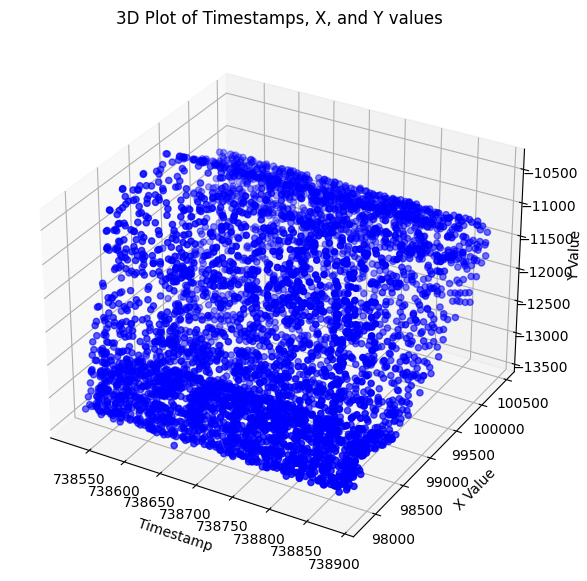

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pypl

ot as plt

# Sample inline data
# inline = [[x1, y1], [x2, y2], ...]

# loaded the inline dataset from your previous interactions
# Generate synthetic timestamps
start_date = "2023-01-01"
end_date = "2023-12-31"
timestamps = pd.date_range(start_date, end_date, periods=len(inline)).tolist()

# Combine inline data with timestamps
merged_data = [(timestamp, coord[0], coord[1]) for timestamp, coord in zip(timestamps, inline)]

# Convert merged data to DataFrame
df = pd.DataFrame(merged_data, columns=["Timestamp", "X", "Y"])

# Convert Timestamps to numerical data for 3D plotting (using date ordinal)
df["Timestamp"] = df["Timestamp"].apply(lambda x: x.toordinal())

# 3D Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df["Timestamp"], df["X"], df["Y"], c='b', marker='o')

ax.set_xlabel('Timestamp')
ax.set_ylabel('X Value')
ax.set_zlabel('Y Value')
ax.set_title("3D Plot of Timestamps, X, and Y values")

# Display the plot
plt.show()


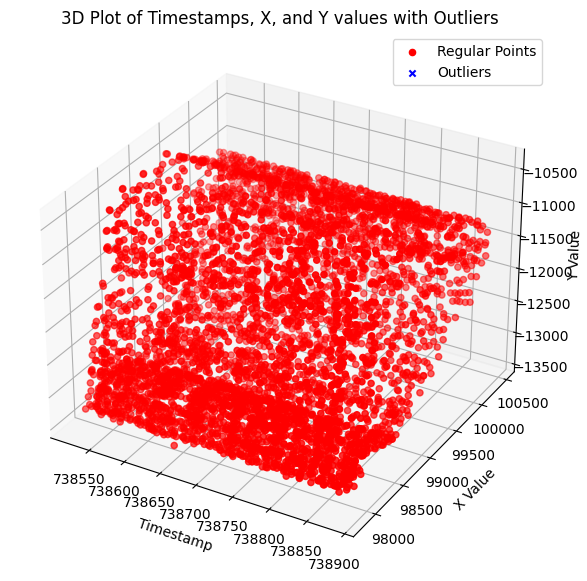

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# Generate synthetic timestamps
start_date = "2023-01-01"
end_date = "2023-12-31"
timestamps = pd.date_range(start_date, end_date, periods=len(inline)).tolist()

# Combine inline data with timestamps
merged_data = [(timestamp, coord[0], coord[1]) for timestamp, coord in zip(timestamps, inline)]

# Convert merged data to DataFrame
df = pd.DataFrame(merged_data, columns=["Timestamp", "X", "Y"])

# Convert Timestamps to numerical data for 3D plotting (using date ordinal)
df["Timestamp"] = df["Timestamp"].apply(lambda x: x.toordinal())

# Detecting outliers for the 'X' and 'Y' columns
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    return (column < (Q1 - 1.5 * IQR)) | (column > (Q3 + 1.5 * IQR))

outliers_mask = detect_outliers(df['X']) | detect_outliers(df['Y'])

# 3D Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the regular data points
ax.scatter(df["Timestamp"][~outliers_mask], df["X"][~outliers_mask], df["Y"][~outliers_mask], c='r', marker='o', label="Regular Points")

# Plotting the outliers
ax.scatter(df["Timestamp"][outliers_mask], df["X"][outliers_mask], df["Y"][outliers_mask], c='b', marker='x', label="Outliers")

ax.set_xlabel('Timestamp')
ax.set_ylabel('X Value')
ax.set_zlabel('Y Value')
ax.set_title("3D Plot of Timestamps, X, and Y values with Outliers")
ax.legend()

# Display the plot
plt.show()


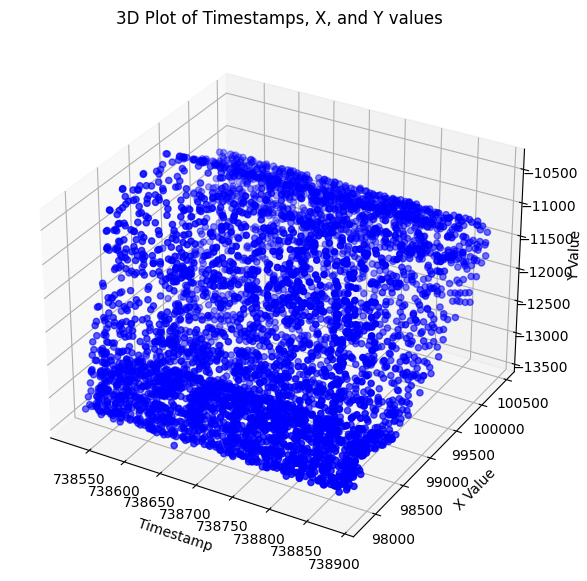

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Generate synthetic timestamps
start_date = "2023-01-01"
end_date = "2023-12-31"
timestamps = pd.date_range(start_date, end_date, periods=len(outline)).tolist()

# Combine inline data with timestamps
merged_data2 = [(timestamp, coord[0], coord[1]) for timestamp, coord in zip(timestamps, outline)]

# Convert merged data to DataFrame
df = pd.DataFrame(merged_data, columns=["Timestamp", "X", "Y"])

# Convert Timestamps to numerical data for 3D plotting (using date ordinal)
df["Timestamp"] = df["Timestamp"].apply(lambda x: x.toordinal())

# 3D Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df["Timestamp"], df["X"], df["Y"], c='b', marker='o')

ax.set_xlabel('Timestamp')
ax.set_ylabel('X Value')
ax.set_zlabel('Y Value')
ax.set_title("3D Plot of Timestamps, X, and Y values")

# Display the plot
plt.show()

In [ ]:
# Sample inline and outline data
# inline = [[x1, y1], [x2, y2], ...]
# outline = [[x1, y1], [x2, y2], ...]

data_textual = ["X: {} Y: {}".format(x, y) for x, y in inline + outline]


In [78]:
!pip install transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 27.3 MB/s eta 0:00:00


In [19]:
import matplotlib.pyplot as plt
import numpy as np

file_path = 'inners1.txt'

x = []
y = []

try:
    with open(file_path, 'r') as f:
        for line_num, line in enumerate(f, start=1):
            coords = line.strip().split(',')
            if len(coords) < 2:
                print(f"Skipping invalid line {line_num}: {line.strip()}")
                continue

            try:
                x_val = float(coords[0].strip())
                y_val = float(coords[1].strip())
                x.append(x_val)
                y.append(y_val)
            except ValueError as e:
                print(f"Skipping invalid line {line_num}: {line.strip()}")
except FileNotFoundError:
    print(f"File not found: {file_path}")

# Check if data is read successfully
if not x or not y:
    print("No valid data found.")
else:
    x = np.array(x)
    y = np.array(y)

    x_norm = np.interp(x, (min(x), max(x)), (0, 4))
    y_norm = np.interp(y, (min(y), max(y)), (0, 4))

    x_idx = np.round(x_norm).astype(int)
    y_idx = np.round(y_norm).astype(int)

    grid = np.full((5, 5), '', dtype=str)
    labels = [chr(i) for i in range(ord('A'), ord('A') + len(x))]

    for i, label in enumerate(labels):
        grid[y_idx[i], x_idx[i]] = label

    fig, ax = plt.subplots(figsize=(6, 6))

    for i in range(6):
        ax.axhline(i, color="black", lw=1)
        ax.axvline(i, color="black", lw=1)

    for i in range(5):
        for j in range(5):
            ax.text(j+0.5, 5-i-0.5, grid[i, j], ha='center', va='center', fontsize=12)

    ax.set_xticks(np.arange(0, 6, 1))
    ax.set_yticks(np.arange(0, 6, 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    plt.show()


Skipping invalid line 1: [[97891.96064244593, -13304.748564803516], [97941.9632222884, -13155.94499795919], [97981.69695686174, -12972.248352363582], [98002.26885707927, -12820.837817293379], [98007.34127291794, -12805.756242381121], [98014.70104416861, -12792.645626330488], [98072.9460318617, -12696.776905738356], [98026.91536078455, -12580.293603856679], [98043.19229114724, -12389.906269520581], [98089.29499122516, -12176.096544456976], [98136.51044666728, -11933.245806030205], [98229.82376156515, -11644.732666123722], [98314.89998975613, -11193.185192206709], [98314.71080711535, -11179.175354436386], [98315.94717140825, -11159.140940292698], [98305.18456610144, -10920.074792618854], [98364.04316224417, -10648.039237166244], [98582.5935018735, -10485.939866826227], [98917.96340605042, -10494.39862293279], [99291.05365395237, -10451.281878223826], [99583.69254642328, -10695.501932633417], [99898.88095111442, -10934.396536603575], [100197.05421061142, -11030.384928746615], [100333.2979

Problem statement:

Definition: Trajectory T is a series of time-orantied points defined as:
Tj = {Pj1,Pj2...Pjm}
where each point pji is represented as ⁉Pji = (Xji, Yji) with Xji and YJi denoting the latitude and longitude respectively both belonging to R2.

In [3]:
import math

def MiPo(G, k):
    """ Transform trajectory data G into tabular data features.

    Parameters:
        G (list): Trajectory dataset with source point S and destination point D
        k (int): Number of bins

    Returns:
        list: Tabular data features F
    """

    # Assume G is a list of trajectories, where each trajectory is a list of points (x, y)
    S = G[0][0]
    D = G[0][-1]

    M = ((S[0] + D[0]) / 2, (S[1] + D[1]) / 2)

    F = []

    for Tj in G:
        # Convert points to polar coordinates
        for i in range(len(Tj)):
            Pij = Tj[i]
            theta_ij = math.atan2(Pij[1] - M[1], Pij[0] - M[0])
            dij = math.sqrt((Pij[0] - M[0])**2 + (Pij[1] - M[1])**2)
            Tj[i] = (theta_ij, dij)

        # Distribute points into bins by their angle
        bm = [set() for _ in range(k)]
        for Pij in Tj:
            m = int((Pij[0] % (2 * math.pi)) // (2 * math.pi / k))
            bm[m].add(Pij[1])  # Only store distance to avoid duplicates

        # Extract distance and point features
        FjD = []
        FjP = []
        for m in range(k):
            distSum = sum(bm[m])
            FjD.append(distSum / k)
            FjP.append(len(bm[m]))

        # Merge distance and point features
        Fj = FjD + FjP
        F.append(Fj)

    return F




converting the spatial data of a trajectory into a polar representation with
respect to the midpoint, and then converting that into tabular data by binning based on the angle and computing some features (distance sums and counts).



1. Conversion to Polar Coordinates:
Given a point P(x,y) and reference point M(Xm,Ym)
  the conversion to polar coordinates is done with the following equations: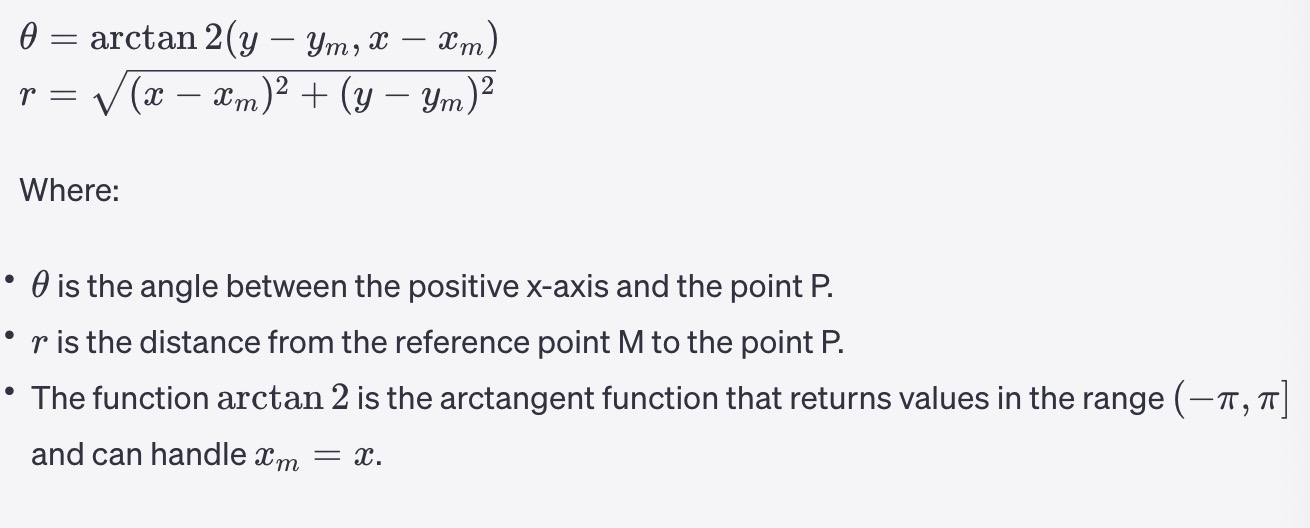

2. Binning Based on the Angle:
The goal is to distribute the points into k bins based on their angles




3.Extracting Features:
For each bin, we calculate two features:

(1)Distance feature
(2)Point Fentures

4. Features: For each trajectory, get a feature vector Fj which is a concatenation of the distance and point features for all k bins.


Idea:
Given a set of data points (trajectories in your case), if you can represent each trajectory with a feature or a set of features, then you can compute the MSE of the data. Points (or trajectories) that contribute disproportionately high to the MSE can be considered outliers.

Here's a simple way to implement this for outlier detection:

Assume that each trajectory is represented by a feature vector (e.g., the output of the MiPo function you've mentioned earlier).
Compute the mean feature vector for all trajectories.
Compute the MSE for each trajectory with respect to the mean feature vector.
Mark trajectories with an MSE greater than a certain threshold (e.g., 2 or 3 standard deviations above the mean MSE) as outliers.

In [2]:
import numpy as np

def compute_mse(v1, v2):

    return np.mean((v1 - v2) ** 2)

def detect_outliers_using_mse(feature_vectors, threshold_factor=3):

# Parameters:
# feature_vectors (list): List of feature vectors for trajectories.
# threshold_factor (int): Factor to multiply by standard deviation for outlier detection.

# Returns:
        list: List of indices of outlier trajectories.
# mean_vector = np.mean(feature_vectors, axis=0)
# mse_values = [compute_mse(vec, mean_vector) for vec in feature_vectors]
# mse_mean = np.mean(mse_values)
# mse_std = np.std(mse_values)
# threshold = mse_mean + threshold_factor * mse_std
# outliers = [i for i, mse in enumerate(mse_values) if mse > threshold]
# return outliers



SyntaxError: ignored